In [1]:
import geopandas as gpd
import numpy as np
import shapely
import geofileops as gfo
import tempfile
from pathlib import Path
import matplotlib.pyplot as plt
import logging

from scientific_python_utils.geometric import merge_classified_polygons_by_voting

In [2]:
N_SQUARES = 40
SQUARE_WIDTH = 0.1
N_CLASSES = 4

Create dummy data

<Axes: >

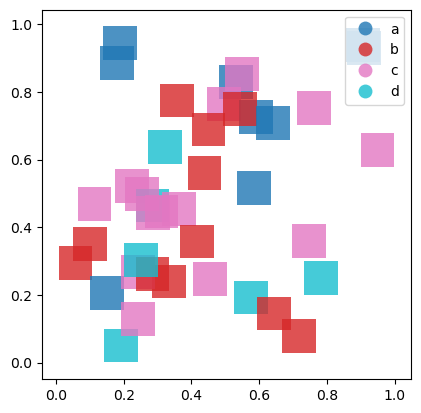

In [3]:
tl_corners = np.random.random((N_SQUARES, 2)) * (1 - SQUARE_WIDTH)
boxes = [
    shapely.box(tl[0], tl[1], tl[0] + SQUARE_WIDTH, tl[1] + SQUARE_WIDTH)
    for tl in tl_corners
]
classes = np.array(["abcd"[i] for i in np.random.randint(0, N_CLASSES, size=N_SQUARES)])
random_data = np.random.randint(0, N_CLASSES, size=N_SQUARES)

classified_polygons = gpd.GeoDataFrame(
    {"geometry": boxes, "classes": classes, "data": random_data}, crs=3311
)
classified_polygons.plot("classes", alpha=0.8, cmap="tab10", legend=True)

/home/exouser/miniconda3/envs/spatial-utils/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Ties had to be broken for 9.2% of the total predictions


,classes,geometry
0,d,"MULTIPOLYGON (((0.242 0.078, 0.242 0.0005, 0.1..."
1,c,"MULTIPOLYGON (((0.242 0.101, 0.193 0.101, 0.19..."
2,a,"MULTIPOLYGON (((0.108 0.255, 0.192 0.255, 0.2 ..."
3,b,"MULTIPOLYGON (((0.285 0.254, 0.285 0.29, 0.292..."


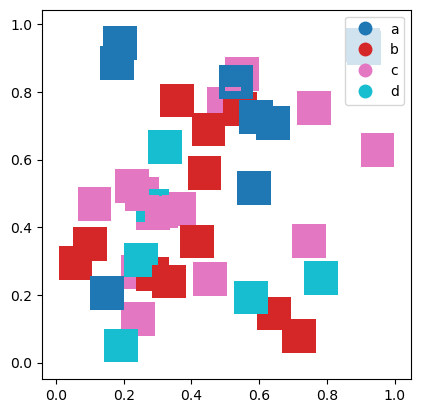

In [4]:
merged = merge_classified_polygons_by_voting(classified_polygons=classified_polygons, class_column="classes", print_tiebreaking_stats=True)
merged.plot("classes", cmap="tab10", legend=True)
merged